# Задание для итоговой работы

**Анализ данных о покупках** 

* Шаг 1. Импорт библиотек 
* Шаг 2. Загрузка данных из файлов (customers.csv, transactions.csv, product.csv)
* Шаг 3. Очистка данных
    1. Проверить соответствие типов данных, выполнить преобразование типов данных при необходимости
    1. Проверить на пропуски, заполнить пропуски при необходимости 
    1. Проверить данные на наличие дубликатов в датасетах *customers* и *product*
    1. Выполнить поиск аномалий в данных, построить диаграмму размаха по признаку возраст покупателя, выполнить удаление выбросов при необходимости
* Шаг 4. Разведочный (исследовательский) анализ данных
    1. Определить сколько товаров продавалось в разные месяцы, построить график плотности
    1. Определить список товаров ТОП-10 с максимальной выручкой за все время, построить столбчатую диаграмму
    1. Определить список популярных товаров ТОП-10 за все время, построить столбчатую диаграмму
    1. Определить долю товаров, которые были проданы один раз, построить круговую диаграмму
    1. Определить какая возрастная группа покупает больше товаров, группы формировать с шагом 10 лет, построить столбчатую диаграмму и график плотности распределения
    1. Определить покупают ли больше товаров те, кто активно следит за новостями о моде, построить стобчатую диаграмму
* Шаг 5. Анализ взаимосвязи признаков
    1. Проверить гипотезу о данных - влияет ли статус членства клуба на количество купленных товаров, найти p-value, сформулировать вывод
* Шаг 6. Кластеризация по покупателем
    1. Сформировать датасет с признаками *покупатель, количество купленных товаров, возраст, итоговая потраченная сумма, членство в клубе, частота просмотра новостей*
    1. Найти оптимальное количество кластеров по покупателям
    1. Построить модель кластеризации данных
    1. Визуализировать кластеры с помощью диаграммы рассеивания, выбрать подходящие признаки для диаграммы
* Шаг 7. Построение рекомендательной системы 
    1. Сформировать датасет с признаками *покупатель, товар, количество купленных товаров*
    1. Выполнить коллаборативную фильтрацию по схожести покупателей
    1. Вывести в качестве рекомендаций список наименований товаров для пользователя с ИД = 6510
    

Исходные файлы для анализа:

https://github.com/OlesiaAngel/DataAnalitics/blob/main/%D0%B4%D0%B0%D0%BD%D0%BD%D1%8B%D0%B5/stat/transactions.csv?raw=true

https://github.com/OlesiaAngel/DataAnalitics/blob/main/%D0%B4%D0%B0%D0%BD%D0%BD%D1%8B%D0%B5/stat/customers.csv?raw=true

https://github.com/OlesiaAngel/DataAnalitics/blob/main/%D0%B4%D0%B0%D0%BD%D0%BD%D1%8B%D0%B5/stat/product.csv?raw=true



### Описание датасета
#### customers.csv

Признак | Описание
--:|:--
club_member | Статус члена клуба магазина
fashion_news | Часто ли смотрит новости о моде
age | Возраст
customer_id | Уникальный идентификатор покупателя


#### transactions.csv
Признак | Описание
--:|:--
t_dat | Дата
article_id | Уникальный идентификатор товара
price | Цена товара
customer_id | Уникальный идентификатор покупателя


#### product.csv
Признак | Описание
--:|:--
article_id | Уникальный идентификатор товара
product_name | Наименование товара
colour | Цвет товара

# Шаг 1. Импорт библиотек

In [1]:
import pandas as pd # Pandas — Библиотека Python для обработки и анализа структурированных данных 
import seaborn as sns # Seaborn — Библиотека для создания статистических графиков. Построена на основе matplotlib.
import datetime as dt  # Модуль позволяет управлять датами и временем
from datetime import datetime # Модуль для работы с датой и временем
import matplotlib as mpl # Matplotlib — Библиотека на языке Python для визуализации данных двумерной графикой.
import matplotlib.pyplot as plt # Модуль pyplot — Коллекция функций для работы с изображением графика
import plotly.express as px

from sklearn.cluster import KMeans
import scipy.sparse as sparse
import numpy as np
import sweetviz as sv 
from collections import Counter 
import scipy.stats as st         

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import warnings
warnings.filterwarnings('ignore')

from pylab import rcParams     #конфигурация среды выполнения Matplotlib

rcParams["figure.figsize"] = 10, 6  # Задал размер фигуры 10 x 6 dpi (по умолчанию задано 8 x 6 dpi)
sns.set_style("whitegrid", {'axes.grid' : True, 'axes.facecolor': '0.8','grid.color': '0.1','figure.facecolor': '0.95'}) #set seaborn style

# Шаг 2. Загрузка данных из файлов (customers.csv, transactions.csv, product.csv)

In [3]:
df_customers = pd.read_csv("https://github.com/OlesiaAngel/DataAnalitics/blob/main/%D0%B4%D0%B0%D0%BD%D0%BD%D1%8B%D0%B5/stat/customers.csv?raw=true", index_col=0)

df_purchase = pd.read_csv("https://github.com/OlesiaAngel/DataAnalitics/blob/main/%D0%B4%D0%B0%D0%BD%D0%BD%D1%8B%D0%B5/stat/transactions.csv?raw=true", index_col=0)

df_product = pd.read_csv("https://github.com/OlesiaAngel/DataAnalitics/blob/main/%D0%B4%D0%B0%D0%BD%D0%BD%D1%8B%D0%B5/stat/product.csv?raw=true", index_col=0)

# Шаг 3. Очистка данных
    1. Проверить соответствие типов данных, выполнить преобразование типов данных при необходимости

In [4]:
df_purchase.info() # В датасете надо преобразовать тип даныых в столбце "t_dat" в datetime // Мы увидим, являются ли эти столбцы числовыми или категориальными признаками.
df_product.info()  # Метод библиотеки Pandas выводит инфо о DataFrame,типы данных столбцов,индексы,количество значений,ненулевые значения,использование памяти.
df_customers.info() # В данном датасете замечены 3 столбца с пропусками + преобразовать тип даныых в столбце "age" из float в int

<class 'pandas.core.frame.DataFrame'>
Int64Index: 317884 entries, 0 to 317883
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   t_dat        317884 non-null  object 
 1   article_id   317884 non-null  int64  
 2   price        317884 non-null  float64
 3   customer_id  317884 non-null  int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 12.1+ MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 53626 entries, 0 to 53625
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   article_id    53626 non-null  int64 
 1   product_name  53626 non-null  object
 2   color         53626 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.6+ MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 229804 entries, 0 to 229803
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0 

In [5]:
df_purchase.head(10) # Получение 10 записей из начала датафрейма

,t_dat,article_id,price,customer_id
0,2020-04-13,706016003,33.88,0
1,2018-09-21,493810014,19.05,1
2,2018-10-04,594541012,16.93,2
3,2018-12-11,719712001,36.00,3
4,2019-04-08,700737007,25.41,4
5,2019-03-31,719530004,33.88,5
6,2019-01-28,684210002,53.37,6
7,2019-10-06,775996012,33.88,7
8,2020-07-04,765773004,13.54,8
9,2020-03-31,160442010,13.54,9


In [6]:
df_customers.head(10)

,club_member,fashion_news,age,customer_id
0,ACTIVE,NONE,49.0,91991
1,ACTIVE,Regularly,32.0,164401
2,ACTIVE,Regularly,56.0,182738
3,ACTIVE,Regularly,30.0,166422
4,PRE-CREATE,Regularly,40.0,164557
5,ACTIVE,Regularly,44.0,6089
6,ACTIVE,NONE,26.0,113831
7,ACTIVE,NONE,24.0,212787
8,ACTIVE,Regularly,52.0,194658
9,ACTIVE,NONE,48.0,209256


In [7]:
df_product.head(10)

,article_id,product_name,color
0,108775015,Vest top,Black
1,108775044,Vest top,White
2,110065001,Bra,Black
3,110065002,Bra,White
4,110065011,Bra,Light Beige
5,111565001,Underwear Tights,Black
6,111586001,Leggings/Tights,Black
7,111593001,Underwear Tights,Black
8,111609001,Underwear Tights,Black
9,114428030,Bra,Light Grey


In [8]:
df_customers.age.describe() # Вывод статистических сведений о количественном признаке: разброс значений, среднюю стоимость и медиану

count    228613.000000
mean         35.987402
std          13.195025
min          16.000000
25%          25.000000
50%          31.000000
75%          48.000000
max          98.000000
Name: age, dtype: float64

In [9]:
df_purchase.price.describe() 

count    317884.000000
mean         27.834441
std          19.230723
min           0.190000
25%          15.800000
50%          25.410000
75%          33.880000
max         500.000000
Name: price, dtype: float64

2. Проверить на пропуски, заполнить пропуски при необходимости 

In [10]:
df_customers.isnull().sum() / df_customers.shape[0] * 100  # определяю процент пропущенных значений / shape-кортеж который дает размеры массива (0 - строки)

club_member     0.200606
fashion_news    0.539155
age             0.518268
customer_id     0.000000
dtype: float64

In [11]:
# Библиотека Sklearn имеет класс SimpleImputer, который используется для восстановления пропущенных значений.
# Обрабатываю пропуски признаков, заполняя их наиболее часто встречающимся значением, чтобы не было выбросов в df_customers
from sklearn.impute import SimpleImputer

impute = SimpleImputer(missing_values = np.nan, strategy = 'most_frequent')
df_customers["age"] = impute.fit_transform(df_customers["age"].values.reshape(-1,1))[:,0]
df_customers["club_member"] = impute.fit_transform(df_customers["club_member"].values.reshape(-1,1))[:,0]
df_customers["fashion_news"] = impute.fit_transform(df_customers["fashion_news"].values.reshape(-1,1))[:,0]
df_customers.isna().sum() # проверка на нулевые значения

club_member     0
fashion_news    0
age             0
customer_id     0
dtype: int64

In [12]:
df_customers["age"] = df_customers['age'].astype('int') # Преобразую возраст float в int
df_customers.dtypes # сведения о типах данных столбцов.

club_member     object
fashion_news    object
age              int32
customer_id      int64
dtype: object

In [13]:
df_purchase["t_dat"] = pd.to_datetime(df_purchase["t_dat"]) # преобразую формат даты из object 
df_purchase.dtypes

t_dat          datetime64[ns]
article_id              int64
price                 float64
customer_id             int64
dtype: object

3. Проверить данные на наличие дубликатов в датасетах *customers* и *product*

In [15]:
df_customers.duplicated().sum() 

0

In [16]:
df_product.duplicated().sum() 

0

4. Выполнить поиск аномалий в данных, построить диаграмму размаха по признаку возраст покупателя, выполнить удаление выбросов при необходимости

In [17]:
# подсчитать количество значений в конкретном столбце / используется для получения Series, содержащего уникальные значения. Она вернет результат, отсортированный в порядке убывания, так что первый элемент в коллекции будет самым встречаемым. NA-значения не включены в результат.
df_purchase.t_dat.value_counts()

2019-09-28    1995
2020-04-11    1727
2019-11-29    1608
2018-11-23    1406
2018-09-29    1356
              ... 
2018-09-22     177
2019-01-01     173
2018-12-25     135
2020-01-01     125
2019-12-25     115
Name: t_dat, Length: 734, dtype: int64

In [18]:
# изучаю временной интервал выборки - C 20/09/2018 по 22.09.2020 (2 года)
df_purchase.t_dat.describe()

count                  317884
unique                    734
top       2019-09-28 00:00:00
freq                     1995
first     2018-09-20 00:00:00
last      2020-09-22 00:00:00
Name: t_dat, dtype: object

In [19]:
df_purchase.price.value_counts()   # 4046 значения цены

16.93     34170
33.88     33868
25.41     32773
13.54     15075
50.83     14923
          ...  
60.22         1
90.80         1
27.69         1
4.12          1
215.56        1
Name: price, Length: 4046, dtype: int64

In [20]:
df_purchase.article_id.value_counts() # 53626 уникальных артикулов товара

706016001    506
706016002    348
372860001    295
759871002    275
610776002    275
            ... 
779649003      1
723206001      1
879646001      1
818775001      1
602293002      1
Name: article_id, Length: 53626, dtype: int64

In [21]:
df_purchase.customer_id.value_counts() # 229804 покупателя

23883     21
2458      19
7232      19
5919      17
18097     16
          ..
97731      1
97732      1
97734      1
97735      1
229803     1
Name: customer_id, Length: 229804, dtype: int64

In [22]:
df_product.article_id.value_counts() # 53626 уникальных идентификаторов продуктов

108775015    1
766683003    1
766921003    1
766926001    1
766944001    1
            ..
669562003    1
669562004    1
669562005    1
669562006    1
953450001    1
Name: article_id, Length: 53626, dtype: int64

In [23]:
df_product.color.value_counts() 

Black              13758
White               5154
Dark Blue           4877
Light Pink          2244
Light Beige         1971
Grey                1875
Beige               1674
Blue                1663
Light Blue          1525
Off White           1491
Red                 1477
Greenish Khaki      1421
Dark Grey           1327
Dark Red            1260
Dark Green          1123
Pink                1019
Light Grey           943
Yellow               858
Yellowish Brown      789
Light Orange         781
Gold                 779
Dark Beige           560
Dark Orange          481
Dark Pink            451
Light Yellow         431
Orange               396
Green                370
Silver               336
Light Turquoise      293
Light Green          282
Light Purple         279
Dark Yellow          252
Dark Turquoise       237
Other Pink           221
Turquoise            172
Dark Purple          136
Light Red            110
Greyish Beige        109
Other Yellow         101
Purple                83


In [23]:
df_product.color.value_counts() / df_product.shape[0] * 100 

Black              25.655466
White               9.611010
Dark Blue           9.094469
Light Pink          4.184537
Light Beige         3.675456
Grey                3.496438
Beige               3.121620
Blue                3.101108
Light Blue          2.843770
Off White           2.780368
Red                 2.754261
Greenish Khaki      2.649834
Dark Grey           2.474546
Dark Red            2.349607
Dark Green          2.094133
Pink                1.900198
Light Grey          1.758475
Yellow              1.599970
Yellowish Brown     1.471301
Light Orange        1.456383
Gold                1.452654
Dark Beige          1.044270
Dark Orange         0.896953
Dark Pink           0.841010
Light Yellow        0.803715
Orange              0.738448
Green               0.689964
Silver              0.626562
Light Turquoise     0.546377
Light Green         0.525864
Light Purple        0.520270
Dark Yellow         0.469921
Dark Turquoise      0.441950
Other Pink          0.412114
Turquoise     

In [24]:
df_customers.club_member.value_counts()  # 3 статуса членства клуба

ACTIVE        223736
PRE-CREATE      6008
LEFT CLUB         60
Name: club_member, dtype: int64

In [26]:
df_customers.club_member.value_counts() / df_customers.shape[0] * 100 

ACTIVE        97.359489
PRE-CREATE     2.614402
LEFT CLUB      0.026109
Name: club_member, dtype: float64

In [27]:
df_customers.fashion_news.value_counts() # 3 статуса просмотра новостей

NONE         135189
Regularly     94527
Monthly          88
Name: fashion_news, dtype: int64

In [28]:
df_customers.fashion_news.value_counts() / df_customers.shape[0] * 100 

NONE         58.827958
Regularly    41.133749
Monthly       0.038294
Name: fashion_news, dtype: float64

In [29]:
df_customers.age.value_counts() # 79 возрастов

25    12320
24    11067
26    10999
27    10429
23     9921
      ...  
89        1
98        1
95        1
87        1
96        1
Name: age, Length: 79, dtype: int64

In [30]:
df_customers.age.value_counts() / df_customers.shape[0] * 100 

25    5.361090
24    4.815843
26    4.786253
27    4.538215
23    4.317157
        ...   
89    0.000435
98    0.000435
95    0.000435
87    0.000435
96    0.000435
Name: age, Length: 79, dtype: float64

In [25]:
print('\033[1m'+ 'Уникальные значения'+'\033[0m'+'\n') # Подсчёт количества уникальных значений в столбце
for i in df_customers.columns.to_list():
    print('\033[91m'+ 'Признак {} имеет {} следующих уникальных значений:'.format(i, len(df_customers[i].unique()))+'\033[0m')
    print(df_customers[i].unique())
    print('\033[1m' + '---------------------------------------------------------------------------------'+ '\033[0m') 

Уникальные значения

Признак club_member имеет 3 следующих уникальных значений:
['ACTIVE' 'PRE-CREATE' 'LEFT CLUB']
---------------------------------------------------------------------------------
Признак fashion_news имеет 3 следующих уникальных значений:
['NONE' 'Regularly' 'Monthly']
---------------------------------------------------------------------------------
Признак age имеет 79 следующих уникальных значений:
[49 32 56 30 40 44 26 24 52 48 19 51 25 20 43 41 60 45 28 27 71 22 36 23
 34 39 50 33 29 55 42 47 53 54 46 59 21 61 58 62 35 68 64 63 38 57 31 65
 37 66 18 72 76 70 75 73 67 69 74 17 78 82 79 77 85 84 88 83 80 93 81 16
 91 89 90 98 95 87 96]
---------------------------------------------------------------------------------
Признак customer_id имеет 229804 следующих уникальных значений:
[ 91991 164401 182738 ...  76150  94386 210647]
---------------------------------------------------------------------------------


In [26]:
print('\033[1m'+ 'Уникальные значения'+'\033[0m'+'\n') # 19
for i in df_product.columns.to_list():
    print('\033[91m'+ 'Признак {} имеет {} следующих уникальных значений:'.format(i, len(df_product[i].unique()))+'\033[0m')
    print(df_product[i].unique())
    print('\033[1m' + '---------------------------------------------------------------------------------'+ '\033[0m') 

Уникальные значения

Признак article_id имеет 53626 следующих уникальных значений:
[108775015 108775044 110065001 ... 949551002 952267001 953450001]
---------------------------------------------------------------------------------
Признак product_name имеет 118 следующих уникальных значений:
['Vest top' 'Bra' 'Underwear Tights' 'Leggings/Tights' 'Trousers'
 'Hair clip' 'Umbrella' 'Sweater' 'Bodysuit' 'Hair string' 'Socks'
 'Unknown' 'Top' 'Pyjama jumpsuit/playsuit' 'Hoodie' 'Hair/alice band'
 'Belt' 'Bikini top' 'Underwear bottom' 'Swimsuit' 'Skirt' 'Hat/beanie'
 'Kids Underwear top' 'Shorts' 'T-shirt' 'Cap/peaked' 'Pyjama set'
 'Sneakers' 'Dress' 'Sunglasses' 'Cardigan' 'Gloves' 'Earring' 'Blazer'
 'Swimwear bottom' 'Jacket' 'Shirt' 'Costumes' 'Robe' 'Scarf' 'Coat'
 'Other accessories' 'Polo shirt' 'Slippers' 'Night gown' 'Alice band'
 'Straw hat' 'Tailored Waistcoat' 'Ballerinas' 'Tie' 'Necklace'
 'Pyjama bottom' 'Felt hat' 'Bag' 'Bracelet' 'Boots' 'Blouse' 'Watch'
 'Beanie' 'Hat/bri

In [27]:
print('\033[1m'+ 'Уникальные значения'+'\033[0m'+'\n') # 20
for i in df_purchase.columns.to_list():
    print('\033[91m'+ 'Признак {} имеет {} следующих уникальных значений:'.format(i, len(df_purchase[i].unique()))+'\033[0m')
    print(df_purchase[i].unique())
    print('\033[1m' + '---------------------------------------------------------------------------------'+ '\033[0m') 

Уникальные значения

Признак t_dat имеет 734 следующих уникальных значений:
['2020-04-13T00:00:00.000000000' '2018-09-21T00:00:00.000000000'
 '2018-10-04T00:00:00.000000000' '2018-12-11T00:00:00.000000000'
 '2019-04-08T00:00:00.000000000' '2019-03-31T00:00:00.000000000'
 '2019-01-28T00:00:00.000000000' '2019-10-06T00:00:00.000000000'
 '2020-07-04T00:00:00.000000000' '2020-03-31T00:00:00.000000000'
 '2018-10-23T00:00:00.000000000' '2019-02-26T00:00:00.000000000'
 '2020-09-03T00:00:00.000000000' '2018-10-29T00:00:00.000000000'
 '2020-07-11T00:00:00.000000000' '2020-09-17T00:00:00.000000000'
 '2019-06-19T00:00:00.000000000' '2019-07-09T00:00:00.000000000'
 '2019-07-01T00:00:00.000000000' '2019-02-27T00:00:00.000000000'
 '2018-10-07T00:00:00.000000000' '2019-01-06T00:00:00.000000000'
 '2020-03-02T00:00:00.000000000' '2020-01-02T00:00:00.000000000'
 '2020-08-23T00:00:00.000000000' '2018-11-13T00:00:00.000000000'
 '2020-05-19T00:00:00.000000000' '2020-07-17T00:00:00.000000000'
 '2019-08-30T0

<AxesSubplot:title={'center':'Распределение покупателей по возрасту'}, ylabel='age'>

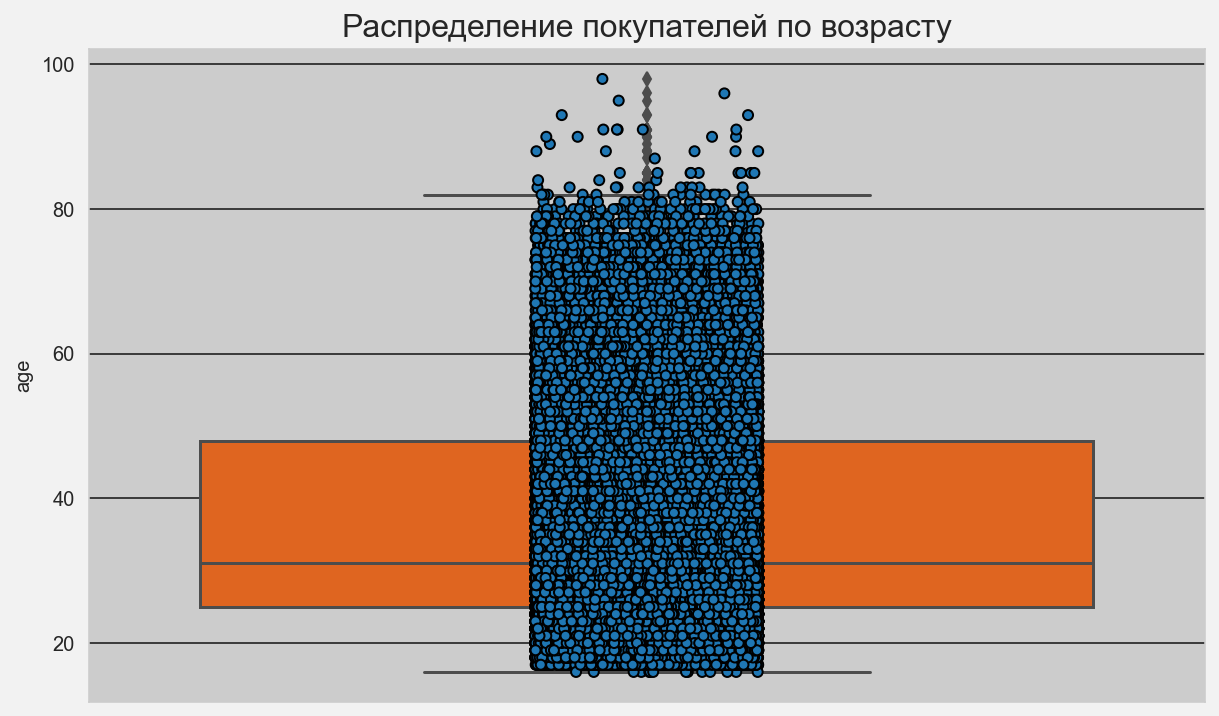

In [28]:
sns.boxplot(y='age', data=df_customers, palette='hot').set_title('Распределение покупателей по возрасту', fontsize=16)
sns.stripplot(y="age", data=df_customers, edgecolor='k', linewidth=1) #цвет линий вокруг точки черный, ширина линии - 1
# диаграмма размаха показывает аномалии
# Ящик с усами позволяет сделать вывод, что возраст большинства клиентов не превышает 80 лет (выше полуторного квартиля находятся > 80 лет)
#  коробка - межквартильный размах

In [29]:
df_customers = df_customers[df_customers['age']<80]   # удаляю выбросы из датасета (возраст >= 80 лет) 122 строки
df_customers.age.sort_values(ascending=False)

125410    79
42060     79
217311    79
46719     79
46776     79
          ..
193399    16
124981    16
170323    16
130778    16
192485    16
Name: age, Length: 229682, dtype: int32

# Шаг 4. Разведочный (исследовательский) анализ данных (EDA)
    1. Определить сколько товаров продавалось в разные месяцы, построить график плотности

In [30]:
df_purchase['month'] = df_purchase['t_dat'].dt.month # Добавляю столбец с месяцем
df_purchase

,t_dat,article_id,price,customer_id,month
0,2020-04-13,706016003,33.88,0,4
1,2018-09-21,493810014,19.05,1,9
2,2018-10-04,594541012,16.93,2,10
3,2018-12-11,719712001,36.00,3,12
4,2019-04-08,700737007,25.41,4,4
...,...,...,...,...,...
317879,2019-01-20,589924010,10.15,229802,1
317880,2019-04-30,706268029,3.39,205253,4
317881,2019-07-03,554792001,25.41,100940,7
317882,2020-02-20,243937028,16.93,162847,2


In [31]:
# сколько товаров продавалось в разные месяцы
df_month = df_purchase.groupby('month').count().sort_values(by='article_id',ascending=False)
df_month["article_id"]

month
6     36848
7     31698
5     29381
4     28219
9     26160
10    25427
8     24846
11    24634
3     23267
1     23165
12    22565
2     21674
Name: article_id, dtype: int64

In [32]:
# добавил столбик с процентовкой
df_month['Procent'] = df_month['article_id'] / df_customers.shape[0] * 100  #  50% покупок было сделано за 4 месяца!(4,5,6,7) худшие месяцы - с 12 по 3
df_month[["article_id", 'Procent']]

,article_id,Procent
month,,
6,36848,16.043051
7,31698,13.800820
5,29381,12.792034
4,28219,12.286117
9,26160,11.389660
10,25427,11.070524
8,24846,10.817565
11,24634,10.725264
3,23267,10.130093


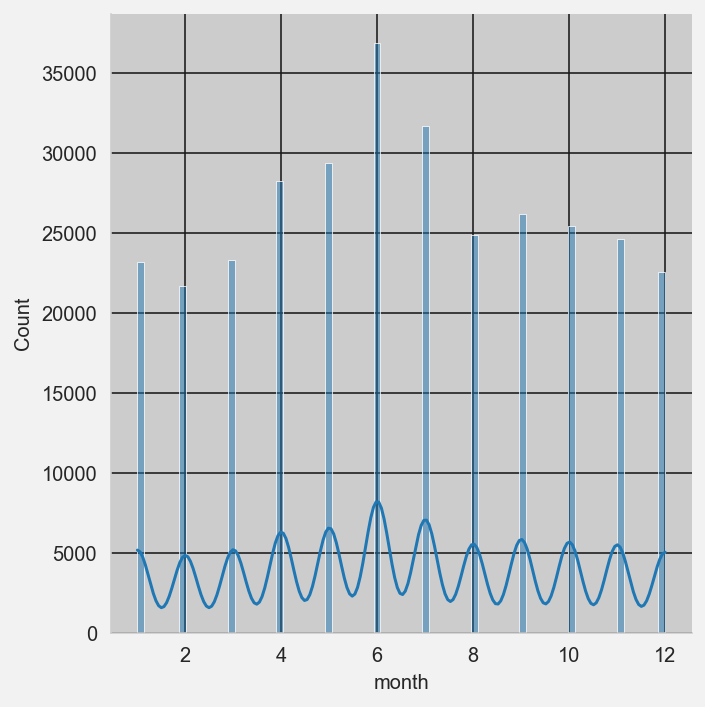

In [33]:
# Оценка плотности ядра - оценки вероятности распределения непрерывных переменных в различных значениях данных.
# KDE Параметр установлен на Правда Чтобы включить график плотности ядра вместе с расспределением
sns.displot(x = df_purchase['month'], data = df_purchase, kde=True) 

<AxesSubplot:xlabel='month', ylabel='Density'>

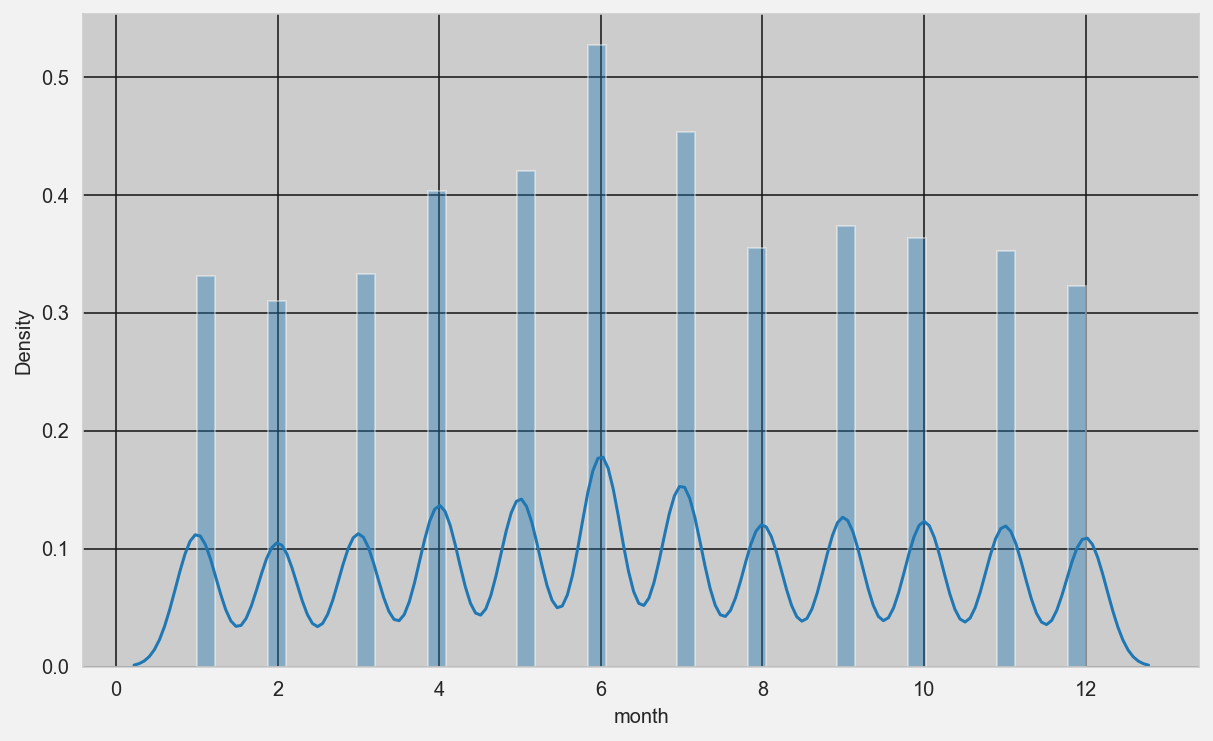

In [34]:
sns.distplot(df_purchase['month']) # график плотности 

2. Определить список товаров ТОП-10 с максимальной выручкой за все время, построить столбчатую диаграмму

In [35]:
# создаю таблицу с выручкой
df_prices = df_purchase[["price","article_id"]].groupby("article_id").sum().sort_values(by="price", ascending=False) \
            .rename(columns={"price":"выручка"}) \
            .reset_index()
df_prices = df_prices.merge(df_product, how='left', left_on='article_id', right_on='article_id') \
            .sort_values(['выручка'],ascending=False)
df_prices

,article_id,выручка,product_name,color
0,706016001,16364.05,Trousers,Black
1,706016002,11309.68,Trousers,Light Blue
2,568601006,9659.58,Blazer,Black
3,448509014,7720.95,Trousers,Blue
4,706016003,7001.72,Trousers,Dark Blue
...,...,...,...,...
53621,214844008,0.76,Hair clip,Light Orange
53622,574226001,0.73,Earring,Gold
53623,220365001,0.61,Sunglasses,Yellowish Brown
53624,639395001,0.42,Sunglasses,Light Orange


In [36]:
# ТОП-10 товаров с максимальной выручкой за все время
df_prices['product'] = df_prices['product_name'] + " " + df_prices['color']
df_profit = df_prices[['article_id', 'выручка', 'product']].head(10)
df_profit

,article_id,выручка,product
0,706016001,16364.05,Trousers Black
1,706016002,11309.68,Trousers Light Blue
2,568601006,9659.58,Blazer Black
3,448509014,7720.95,Trousers Blue
4,706016003,7001.72,Trousers Dark Blue
5,562245046,6886.59,Trousers Black
6,661794001,6848.58,Coat Light Beige
7,399223001,6772.23,Trousers Black
8,720125001,6312.63,Leggings/Tights Black
9,562245001,5761.51,Trousers Black


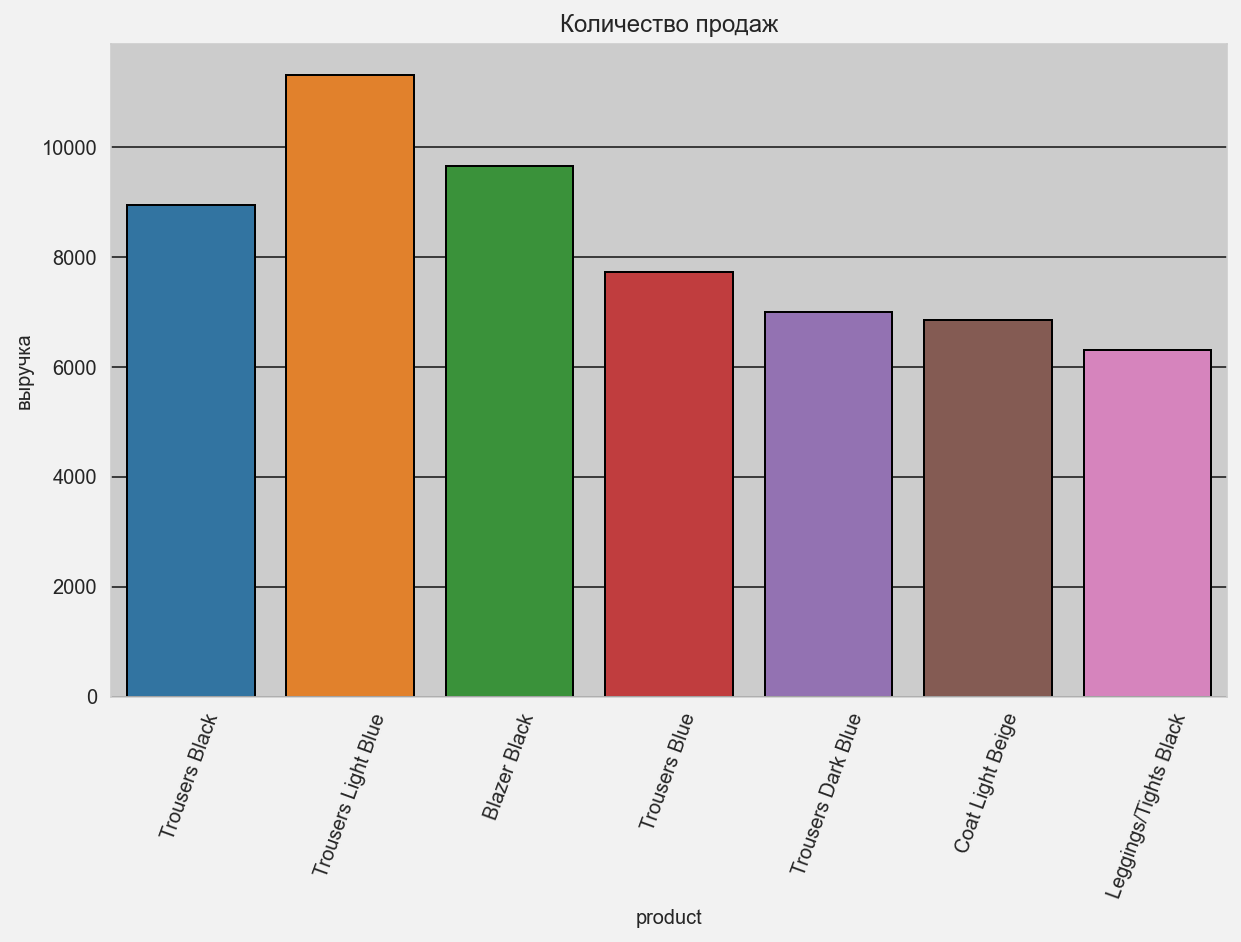

In [37]:
sns.barplot(data = df_profit, x="product", y="выручка", edgecolor = 'black', ci = None)
plt.xticks(rotation=70)
plt.title('Количество продаж')
plt.show()

<AxesSubplot:xlabel='выручка', ylabel='Percent'>

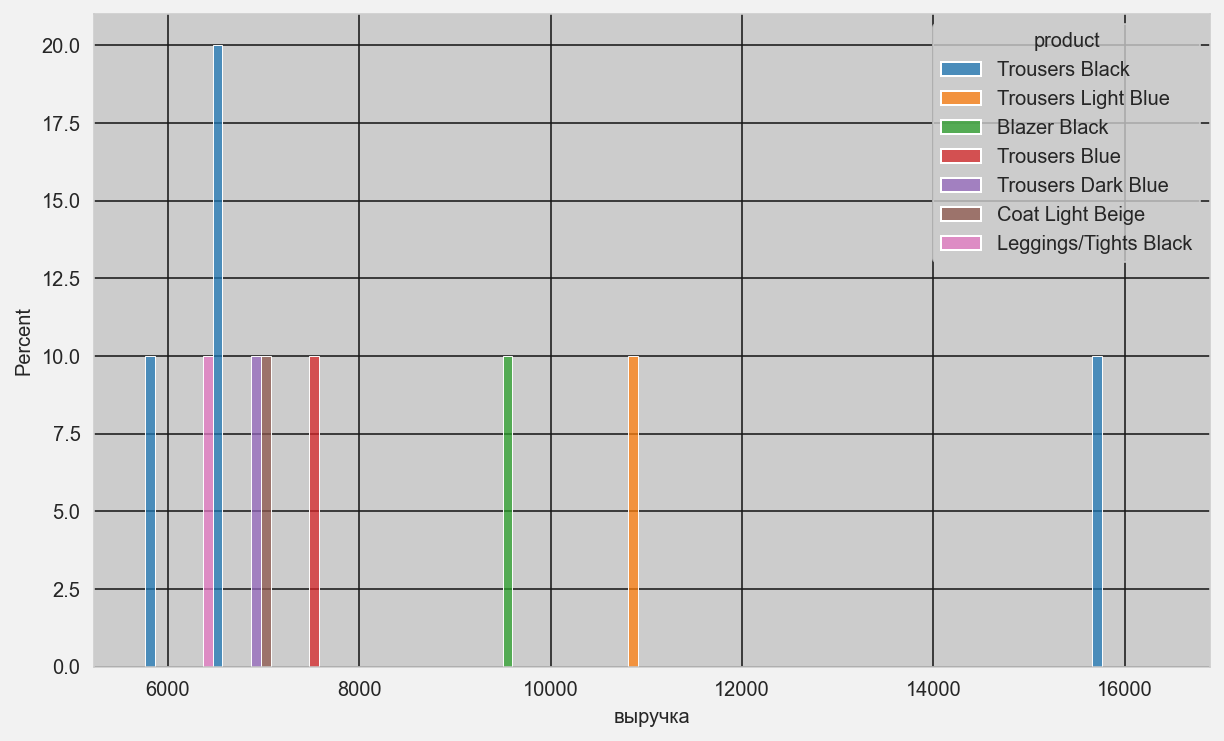

In [38]:
sns.histplot(x = 'выручка', hue = 'product', data = df_prices.head(10), bins=15, multiple="dodge", stat="percent") 
# 70% товаров по выручке - брюки и по 10% - пиджаки, пальто, леггинсы/колготки

3. Определить список популярных товаров ТОП-10 за все время, построить столбчатую диаграмму

In [39]:
# создаю таблицу с количеством проданных товаров
df_popular_item = df_purchase["article_id"].value_counts().reset_index() \
            .rename(columns = {"article_id":"sold_qty","index":"article_id"})
df_popular_item = df_popular_item.merge(df_product, how='left', left_on='article_id', right_on='article_id') \
            .sort_values(['sold_qty'],ascending=False)
df_popular_item.head(10)

,article_id,sold_qty,product_name,color
0,706016001,506,Trousers,Black
1,706016002,348,Trousers,Light Blue
2,372860001,295,Socks,Black
4,610776002,275,T-shirt,Black
3,759871002,275,Vest top,Black
5,464297007,273,Underwear bottom,Black
6,372860002,255,Socks,White
7,156231001,244,Underwear Tights,Black
8,399256001,221,Trousers,Black
9,399223001,220,Trousers,Black


In [40]:
# ТОП 10 популярных товаров за все время
df_popular_item["item"] = df_popular_item["product_name"] + " " + df_popular_item["color"]
df_popular_item[['article_id', 'sold_qty', 'item']].head(10)

,article_id,sold_qty,item
0,706016001,506,Trousers Black
1,706016002,348,Trousers Light Blue
2,372860001,295,Socks Black
4,610776002,275,T-shirt Black
3,759871002,275,Vest top Black
5,464297007,273,Underwear bottom Black
6,372860002,255,Socks White
7,156231001,244,Underwear Tights Black
8,399256001,221,Trousers Black
9,399223001,220,Trousers Black


<AxesSubplot:xlabel='sold_qty', ylabel='Percent'>

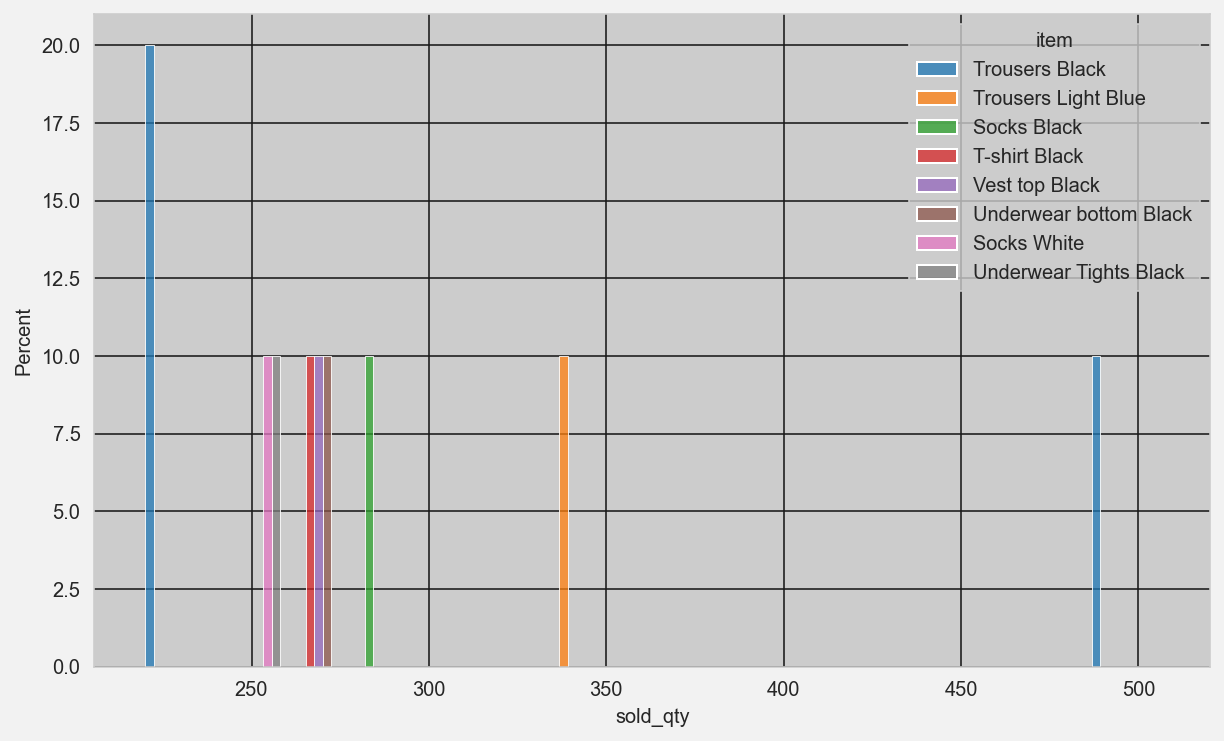

In [41]:
sns.histplot(x = 'sold_qty', hue = 'item', data = df_popular_item.head(10), bins=15, multiple="dodge", stat="percent") 
# 40% товаров (ТОП 10 по продажам) - брюки, 20% - носки, и по 10% - жилетка, нижнее бельё, колготки, майка 

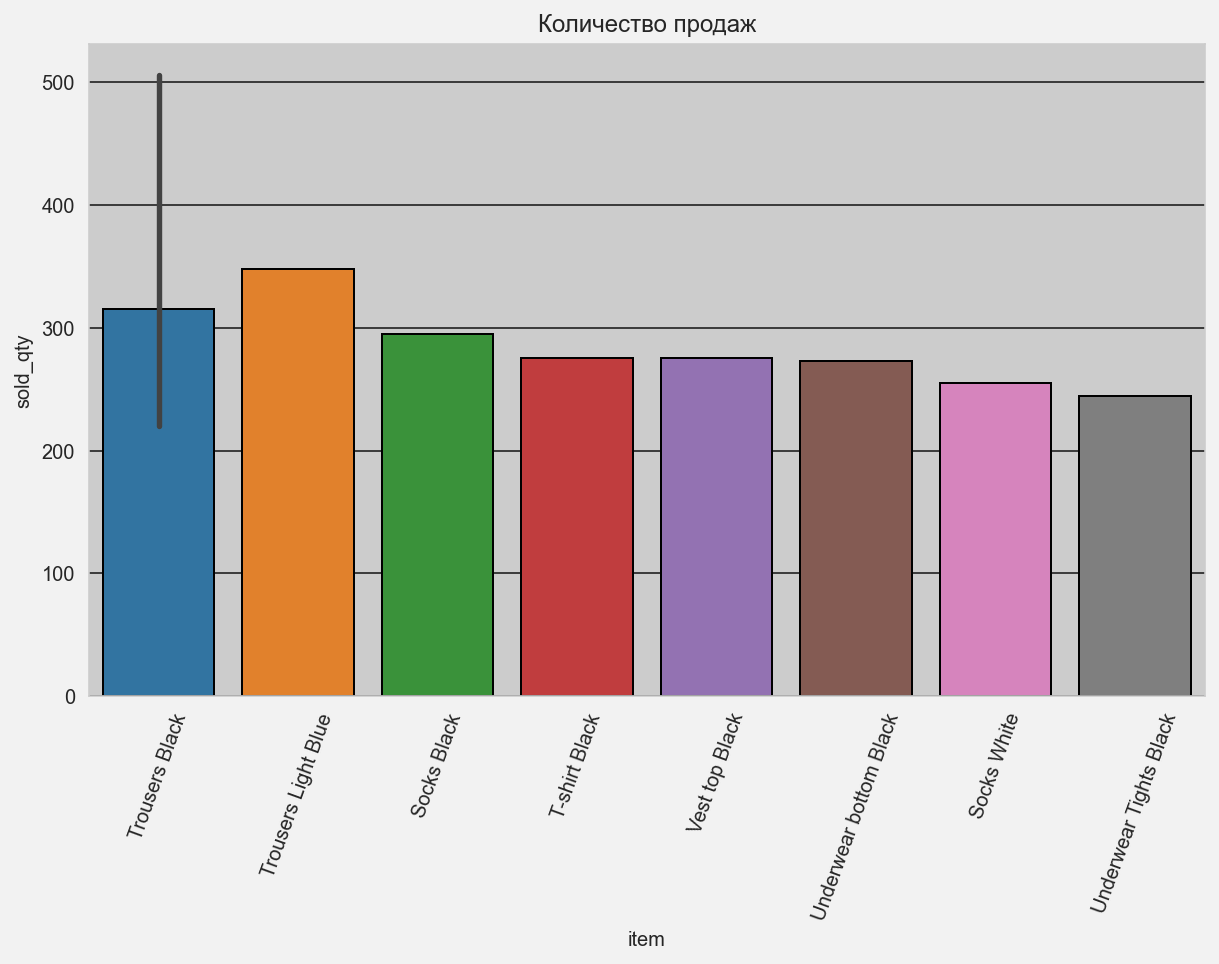

In [42]:
sns.barplot(data = df_popular_item.head(10), x="item", y="sold_qty", edgecolor = 'black')
plt.xticks(rotation=70)
plt.title('Количество продаж')
plt.show()

4. Определить долю товаров, которые были проданы один раз, построить круговую диаграмму

In [45]:
df_onesale_item = df_popular_item['sold_qty'][df_popular_item['sold_qty'] == 1].count() 
df_sale_item = df_popular_item['sold_qty'][df_popular_item['sold_qty'] != 1].count() 

Text(0.5, 1.0, 'Соотношение товаров проданных 1 раз и более')

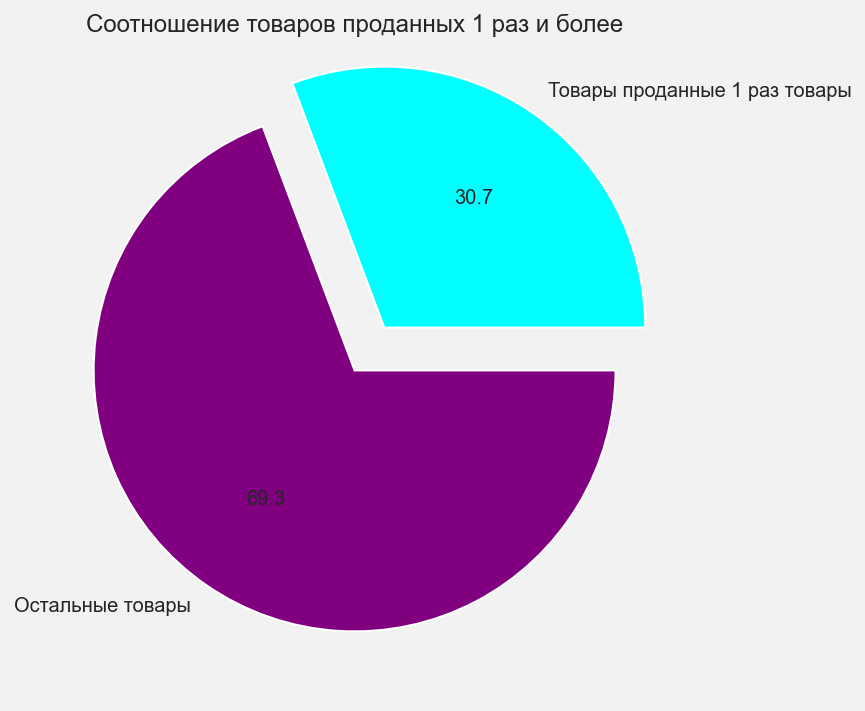

In [47]:
# 30.7% / 69.3%
plt.pie([df_onesale_item, df_sale_item], labels = ['Товары проданные 1 раз товары', 'Остальные товары'], colors = ['aqua','purple'], autopct='%.1f', explode = (0.2,0))
plt.title('Соотношение товаров проданных 1 раз и более')   

5. Определить какая возрастная группа покупает больше товаров, группы формировать с шагом 10 лет, построить столбчатую диаграмму и график плотности распределения

In [49]:
# Определяю кто сколько купил товаров 
df_cust_qty = df_purchase["customer_id"].value_counts().reset_index() \
            .rename(columns = {"customer_id":"sold_qty","index":"customer_id"})
df_cust_qty = df_cust_qty.merge(df_customers, how='inner', left_on='customer_id', right_on='customer_id') \
            .sort_values(['sold_qty'],ascending=False)
df_cust_qty

,customer_id,sold_qty,club_member,fashion_news,age
0,23883,21,ACTIVE,Regularly,61
2,7232,19,ACTIVE,Regularly,54
1,2458,19,ACTIVE,NONE,31
3,5919,17,ACTIVE,Regularly,28
4,18097,16,ACTIVE,NONE,43
...,...,...,...,...,...
115029,205581,1,ACTIVE,Regularly,23
115030,198577,1,ACTIVE,NONE,22
115031,205580,1,ACTIVE,NONE,44
115032,205579,1,ACTIVE,NONE,27


In [50]:
# Добавляю признак категории возрастов
df_cust_qty['age_groups'] = pd.cut(df_cust_qty['age'], bins=[16, 20, 30, 40,50, 60, 70, float('Inf')], labels=['16-20', '20-30','30-40','40-50','50-60','60-70' , '70+'])
df_cust_qty

,customer_id,sold_qty,club_member,fashion_news,age,age_groups
0,23883,21,ACTIVE,Regularly,61,60-70
2,7232,19,ACTIVE,Regularly,54,50-60
1,2458,19,ACTIVE,NONE,31,30-40
3,5919,17,ACTIVE,Regularly,28,20-30
4,18097,16,ACTIVE,NONE,43,40-50
...,...,...,...,...,...,...
115029,205581,1,ACTIVE,Regularly,23,20-30
115030,198577,1,ACTIVE,NONE,22,20-30
115031,205580,1,ACTIVE,NONE,44,40-50
115032,205579,1,ACTIVE,NONE,27,20-30


In [51]:
# определил какая возрастная группа покупает больше товаров
a = df_cust_qty.groupby("age_groups").sum().sort_values(by="sold_qty", ascending=False).reset_index()
a = a[['age_groups', 'sold_qty']].set_index('age_groups').sort_values(by="sold_qty", ascending=False)
a

,sold_qty
age_groups,
20-30,135698
30-40,56581
40-50,52286
50-60,46782
16-20,14610
60-70,10099
70+,1647


<AxesSubplot:xlabel='age', ylabel='Density'>

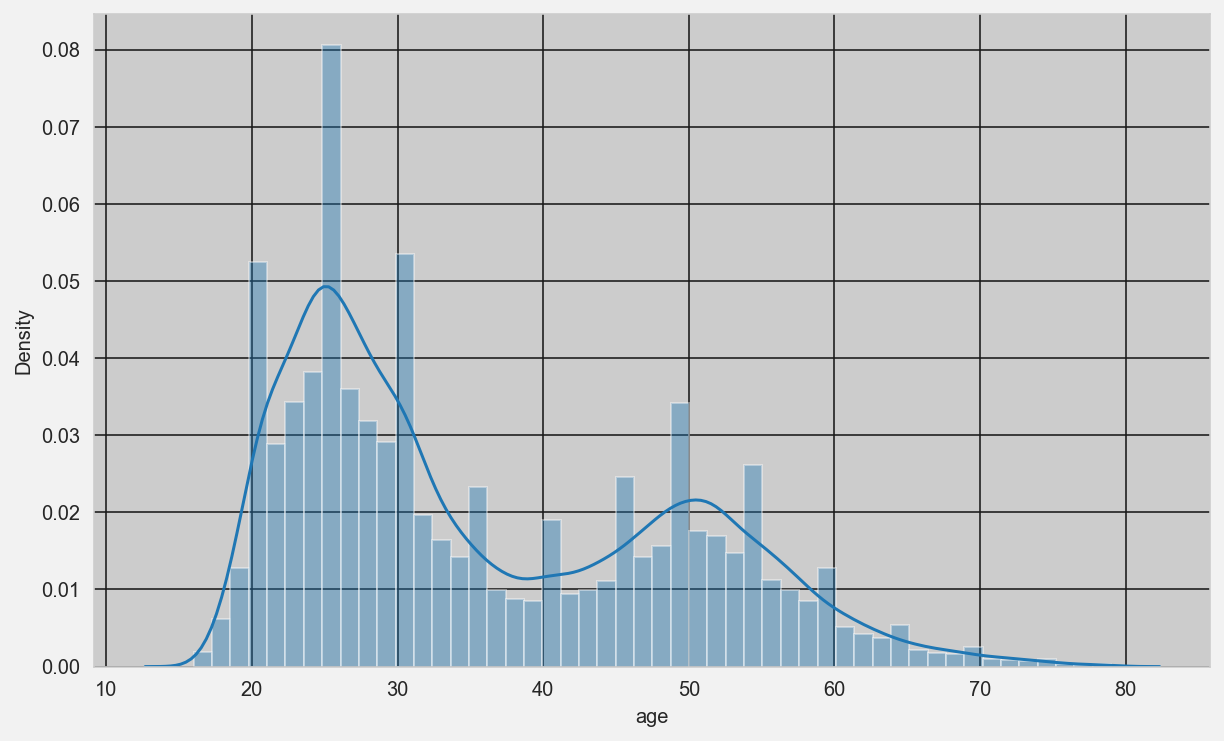

In [52]:
# график плотности покупок по возрасту
sns.distplot(df_cust_qty['age']) 

<AxesSubplot:xlabel='age_groups', ylabel='sold_qty'>

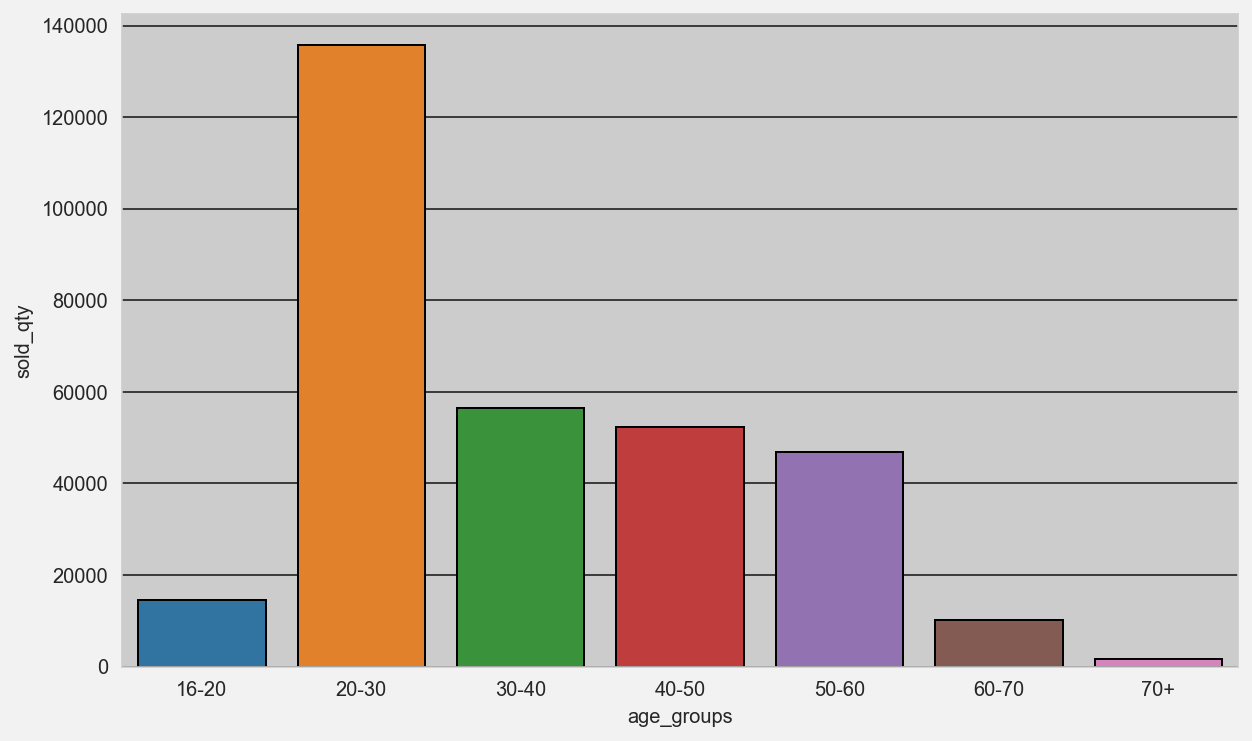

In [53]:
# столбчатая диаграмма (больше всего товаров купили люди в возрасте 20-30 лет, среднее количество товаров купили люди в возрасте от 30-60 лет, и меньше всего купили в возрасте 16-20, 60-79 лет)
sns.barplot(data=df_cust_qty, x="age_groups", y="sold_qty", estimator=np.sum, edgecolor = 'black', ci=None)

6. Определить покупают ли больше товаров те, кто активно следит за новостями о моде, построить стобчатую диаграмму

In [54]:
b = df_cust_qty.groupby("fashion_news").sum().sort_values(by="sold_qty", ascending=False).reset_index()
b = b[['fashion_news', 'sold_qty']]
b

,fashion_news,sold_qty
0,NONE,182289
1,Regularly,135330
2,Monthly,100


<AxesSubplot:xlabel='fashion_news', ylabel='sold_qty'>

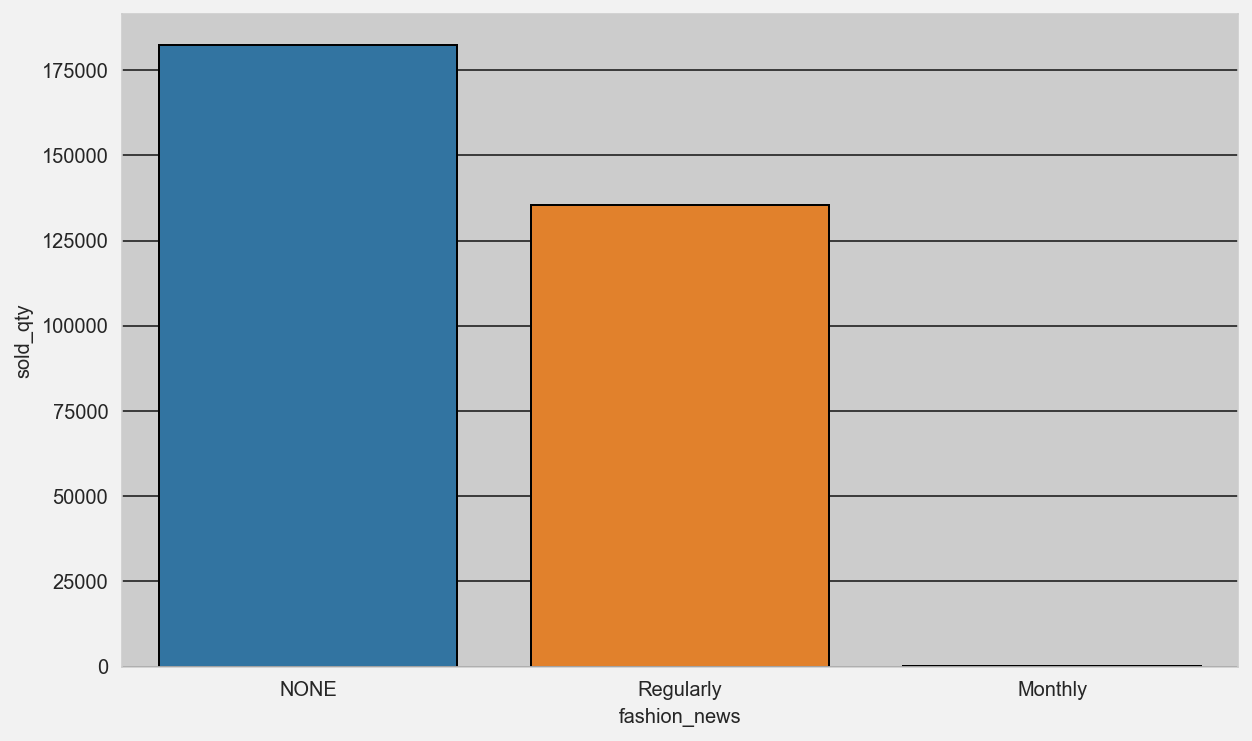

In [55]:
sns.barplot(data=b, x="fashion_news", y="sold_qty", edgecolor = 'black')

# Гиптоеза не верна - те, кто не следят за модой, покупают больше

# Шаг 5. Анализ взаимосвязи признаков
    1. Проверить гипотезу о данных - влияет ли статус членства клуба на количество купленных товаров, найти p-value, сформулировать вывод

Нулевая гипотеза : статус членства клуба не влияет на количество купленных товаров
Альтернативная гипотеза : статус членства клуба влияет на количество купленных товаров

In [57]:
#создал новый столбец "статус членства клуба" + переделал его в числовой  
dct = {"ACTIVE" : 2, 'PRE-CREATE' : 1, "LEFT CLUB" : 0}   
df_cust_qty['club_member_id'] = df_cust_qty['club_member'].map(dct)
df_cust_qty

,customer_id,sold_qty,club_member,fashion_news,age,age_groups,club_member_id
0,23883,21,ACTIVE,Regularly,61,60-70,2
2,7232,19,ACTIVE,Regularly,54,50-60,2
1,2458,19,ACTIVE,NONE,31,30-40,2
3,5919,17,ACTIVE,Regularly,28,20-30,2
4,18097,16,ACTIVE,NONE,43,40-50,2
...,...,...,...,...,...,...,...
115029,205581,1,ACTIVE,Regularly,23,20-30,2
115030,198577,1,ACTIVE,NONE,22,20-30,2
115031,205580,1,ACTIVE,NONE,44,40-50,2
115032,205579,1,ACTIVE,NONE,27,20-30,2


In [58]:
# Проверка на независимость числового типа от числового - метод Пирсона 
# pvalue сравниваю с a(альфа, уровень значимости) = 0,05
from scipy.stats import pearsonr
r = pearsonr(df_cust_qty['club_member_id'], df_cust_qty['sold_qty']) #pearsonr
print('Pearson correlation:', r[0], 'p-value:', r[1])

Pearson correlation: 0.05368658878764415 p-value: 3.4109990093611977e-146


In [59]:
c = df_cust_qty.groupby("club_member").sum().sort_values(by="sold_qty", ascending=False).reset_index()
c[['club_member', 'sold_qty']].set_index('club_member')

,sold_qty
club_member,
ACTIVE,311000
PRE-CREATE,6647
LEFT CLUB,72


# p-value = 0.000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000015484895093617529
# Малое значение p-value говорит о том, что взаимосвязь между признаками статистически подтверждается
# Отвергаем нулевую гипотезу(статус членства клуба не влияет на количество купленных товаров), т.к. есть корреляция(статус членства клуба влияет на количество купленных товаров)

# Шаг 6. Кластеризация по покупателем
    1. Сформировать датасет с признаками *покупатель, количество купленных товаров, возраст, итоговая потраченная сумма, членство в клубе, частота просмотра новостей*

In [60]:
df_prices = df_purchase[["price","customer_id"]].groupby("customer_id").sum().sort_values(by="price", ascending=False) \
            .rename(columns={"price":"Потраченная_сумма"}) \
            .reset_index()
df_cust_qty = df_purchase["customer_id"].value_counts().reset_index() \
            .rename(columns = {"customer_id":"sold_qty","index":"customer_id"})
df_cust_qty = df_cust_qty.merge(df_prices, how='left', left_on='customer_id', right_on='customer_id')
df_cust_qty = df_cust_qty.merge(df_customers, how='left', left_on='customer_id', right_on='customer_id') \
            .sort_values(['sold_qty'],ascending=False)
df_cust_qty['fashion_news'] = df_customers['fashion_news'].replace({"Regularly" : 2, 'Monthly' : 1, "NONE" : 0})
df_cust_qty['club_member'] = df_customers['club_member'].replace({"ACTIVE" : 2, 'PRE-CREATE' : 1, "LEFT CLUB" : 0})
df_cust_qty

,customer_id,sold_qty,Потраченная_сумма,club_member,fashion_news,age
0,23883,21,935.43,2.0,0.0,61.0
2,7232,19,610.12,2.0,2.0,54.0
1,2458,19,662.06,2.0,2.0,31.0
3,5919,17,771.61,2.0,2.0,28.0
4,18097,16,521.77,1.0,2.0,43.0
...,...,...,...,...,...,...
115089,198576,1,10.15,2.0,0.0,61.0
115090,205582,1,50.83,2.0,0.0,61.0
115091,205581,1,42.36,2.0,2.0,23.0
115092,198577,1,33.88,2.0,0.0,22.0


2. Найти оптимальное количество кластеров по покупателям

In [61]:
df_cust_qty.isna().sum()

customer_id            0
sold_qty               0
Потраченная_сумма      0
club_member          122
fashion_news         122
age                  122
dtype: int64

In [62]:
from sklearn.impute import SimpleImputer

impute = SimpleImputer(missing_values = np.nan, strategy = 'most_frequent')
df_cust_qty["age"] = impute.fit_transform(df_cust_qty["age"].values.reshape(-1,1))[:,0]
df_cust_qty["club_member"] = impute.fit_transform(df_cust_qty["club_member"].values.reshape(-1,1))[:,0]
df_cust_qty["fashion_news"] = impute.fit_transform(df_cust_qty["fashion_news"].values.reshape(-1,1))[:,0]
df_cust_qty.isna().sum() # проверка на нулевые значения

customer_id          0
sold_qty             0
Потраченная_сумма    0
club_member          0
fashion_news         0
age                  0
dtype: int64

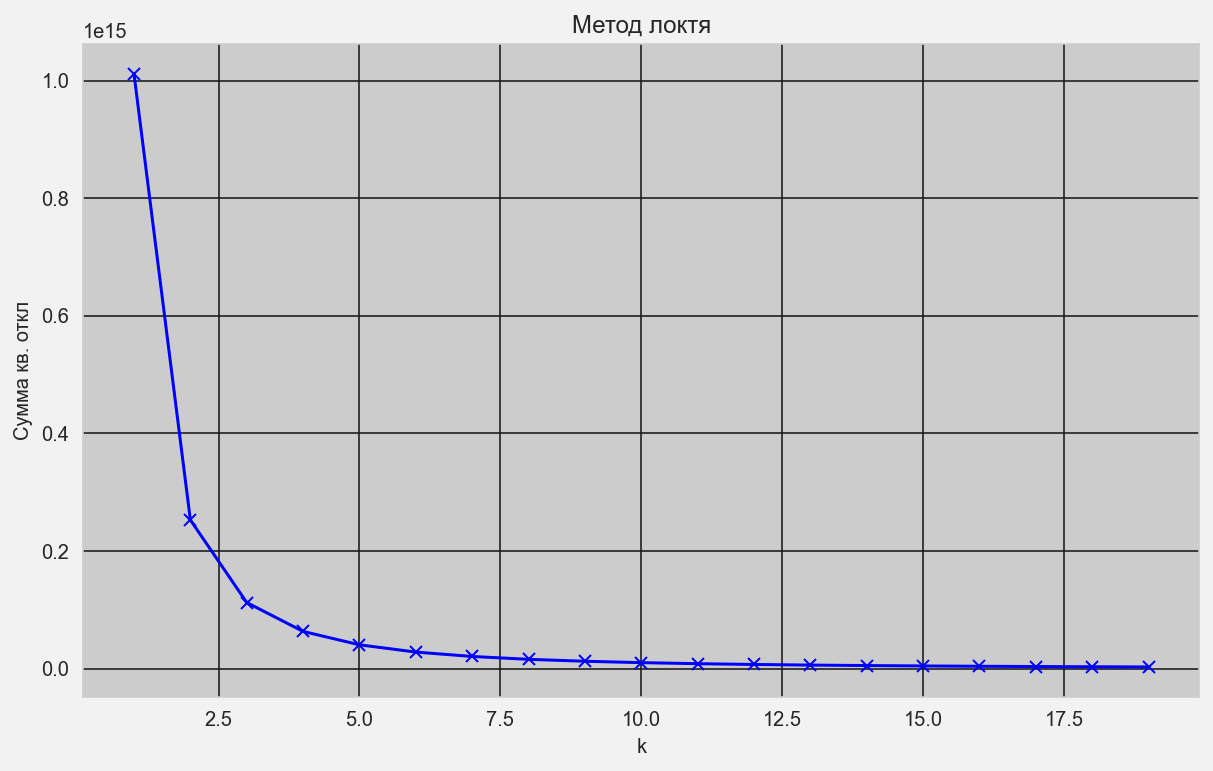

In [63]:
# использую метод локтя, чтобы вычислить оптимальное кол-во кластеров (4)
Sum_of_squared_distances = [] 
K = range(1, 20)
for k in K:
    km = KMeans(n_clusters = k)
    km = km.fit(df_cust_qty)
    Sum_of_squared_distances.append(km.inertia_)
    
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Сумма кв. откл')
plt.title('Метод локтя')
plt.show()

3. Построить модель кластеризации данных

In [64]:
# кластерный анализ на основе 4 кластеров
kmeans = KMeans(n_clusters = 4, random_state=0).fit(df_cust_qty[['sold_qty', 'Потраченная_сумма', 'club_member', 'fashion_news', 'age']])
predict = kmeans.predict(df_cust_qty[['sold_qty', 'Потраченная_сумма', 'club_member', 'fashion_news', 'age']])
df_cust_qty['Кластер'] = predict  # добавляю колонку с кластерами в таблицу
df_cust_qty.head(15)

,customer_id,sold_qty,Потраченная_сумма,club_member,fashion_news,age,Кластер
0,23883,21,935.43,2.0,0.0,61.0,2
2,7232,19,610.12,2.0,2.0,54.0,2
1,2458,19,662.06,2.0,2.0,31.0,2
3,5919,17,771.61,2.0,2.0,28.0,2
4,18097,16,521.77,1.0,2.0,43.0,2
5,34469,16,429.64,2.0,2.0,46.0,2
6,52416,16,562.86,2.0,0.0,68.0,2
7,40359,15,525.26,2.0,0.0,60.0,2
8,10970,15,626.51,2.0,2.0,32.0,2
9,22287,14,699.79,2.0,0.0,61.0,2


4. Визуализировать кластеры с помощью диаграммы рассеивания, выбрать подходящие признаки для диаграммы

In [65]:
from sklearn.feature_selection import SelectKBest # нахожу важные признаки, которые влияют на целевой признак "кластер" - age и Потраченная_сумма 
from sklearn.feature_selection import chi2

X = df_cust_qty
y = df_cust_qty.iloc[:, -1] # выбрать все строки и значение кластера

bestfeatures = SelectKBest(score_func = chi2, k = 'all')
fit = bestfeatures.fit(X, y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

featureScores = pd.concat([dfcolumns, dfscores], axis = 1)
featureScores.columns = ['Specs', 'Score']  
print(featureScores.nlargest(10, 'Score'))  

               Specs         Score
0        customer_id  3.500705e+08
2  Потраченная_сумма  5.503374e+06
5                age  7.033256e+05
6            Кластер  2.201189e+05
1           sold_qty  4.983141e+04
4       fashion_news  4.137315e+00
3        club_member  3.632408e-02


In [66]:
sv.analyze([df_cust_qty, "кластеризация"]).show_html() # анализ датасета и корреляции / Смотрю распределение покупателей по кластерам ( 0 - 28% / 1 - 48% / 2 - 3% / 3 - 21%)

                                             |                                             | [  0%]   00:00 ->…

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [67]:
df_cust_qty.Кластер.value_counts() # подсчет значений в кажом кластере

1    110723
0     64379
3     48080
2      6622
Name: Кластер, dtype: int64

Text(0.5, 1.0, '4 кластера K-Means')

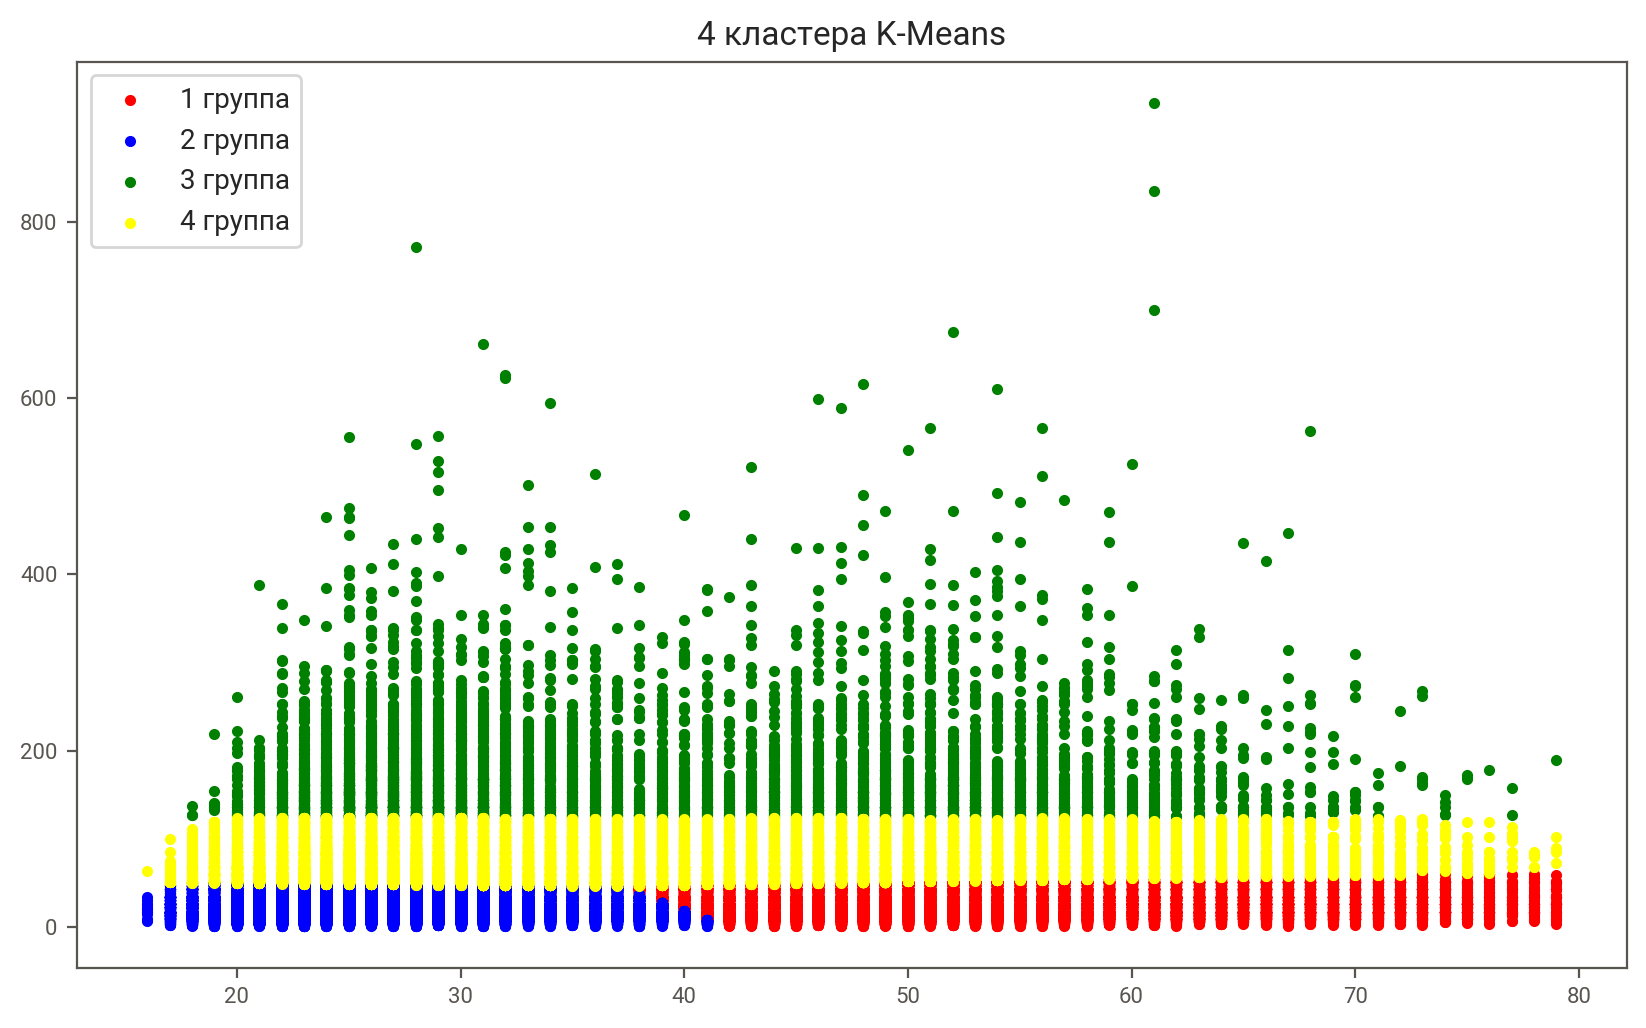

In [68]:
# диаграмма рассеивания
plt.scatter(df_cust_qty[df_cust_qty.Кластер == 0]['age'],
            df_cust_qty[df_cust_qty.Кластер == 0]['Потраченная_сумма'],
            color='red', label='1 группа')

plt.scatter(df_cust_qty[df_cust_qty.Кластер == 1]['age'],
            df_cust_qty[df_cust_qty.Кластер == 1]['Потраченная_сумма'],
            color='blue', label='2 группа')

plt.scatter(df_cust_qty[df_cust_qty.Кластер == 2]['age'],
            df_cust_qty[df_cust_qty.Кластер == 2]['Потраченная_сумма'],
            color='green', label='3 группа')

plt.scatter(df_cust_qty[df_cust_qty.Кластер == 3]['age'],
            df_cust_qty[df_cust_qty.Кластер == 3]['Потраченная_сумма'],
            color='yellow', label='4 группа')

plt.legend(loc='upper left')
plt.title('4 кластера K-Means')

In [69]:
# изучаю значения по возрасту  и потраченной сумме в разных кластерах
df_cust_qty[df_cust_qty['Кластер'] == 0].age.describe() 

count    64379.000000
mean        51.727582
std          7.235880
min         38.000000
25%         47.000000
50%         51.000000
75%         56.000000
max         79.000000
Name: age, dtype: float64

In [70]:
df_cust_qty[df_cust_qty['Кластер'] == 0].Потраченная_сумма.describe()

count    64379.000000
mean        25.929050
std         12.116464
min          0.410000
25%         16.930000
50%         25.410000
75%         33.880000
max         59.900000
Name: Потраченная_сумма, dtype: float64

In [90]:
df_cust_qty[df_cust_qty['Кластер'] == 1].age.describe()

count    110723.000000
mean         26.841948
std           5.168926
min          16.000000
25%          23.000000
50%          26.000000
75%          30.000000
max          41.000000
Name: age, dtype: float64

In [91]:
df_cust_qty[df_cust_qty['Кластер'] == 1].Потраченная_сумма.describe()

count    110723.000000
mean         23.353043
std          10.972048
min           0.420000
25%          15.240000
50%          22.340000
75%          32.900000
max          49.460000
Name: Потраченная_сумма, dtype: float64

In [92]:
df_cust_qty[df_cust_qty['Кластер'] == 2].age.describe()

count    6622.000000
mean       37.667472
std        12.431038
min        18.000000
25%        27.000000
50%        33.000000
75%        49.000000
max        79.000000
Name: age, dtype: float64

In [93]:
df_cust_qty[df_cust_qty['Кластер'] == 2].Потраченная_сумма.describe()

count    6622.000000
mean      175.584748
std        61.228731
min       123.380000
25%       135.580000
50%       155.900000
75%       190.602500
max       935.430000
Name: Потраченная_сумма, dtype: float64

In [94]:
df_cust_qty[df_cust_qty['Кластер'] == 3].age.describe()

count    48080.000000
mean        35.321527
std         12.140943
min         16.000000
25%         26.000000
50%         31.000000
75%         46.000000
max         79.000000
Name: age, dtype: float64

In [95]:
df_cust_qty[df_cust_qty['Кластер'] == 3].Потраченная_сумма.describe()

count    48080.000000
mean        71.347668
std         19.158686
min         46.550000
25%         55.900000
50%         67.760000
75%         84.710000
max        123.730000
Name: Потраченная_сумма, dtype: float64

# Шаг 7. Построение рекомендательной системы 
    1. Сформировать датасет с признаками *покупатель, товар, количество купленных товаров*

In [71]:
df_rekomend = df_purchase[['customer_id', 'article_id']].value_counts().reset_index() \
           .rename(columns = {0:'rating', 'customer_id':'user', 'article_id':'item'})
df_rekomend.head(10)

,user,item,rating
0,37865,678342001,5
1,39574,507909001,4
2,26097,189634001,3
3,25061,684209012,3
4,65998,694966001,3
5,13165,685816002,3
6,103316,570003002,3
7,85172,789060007,3
8,8655,758043001,3
9,19594,697054015,3


2. Выполнить коллаборативную фильтрацию по схожести покупателей

3. Вывести в качестве рекомендаций список наименований товаров для пользователя с ИД = 6510

In [72]:
from sklearn.neighbors import NearestNeighbors  
from collections import defaultdict
from scipy.sparse import csr_matrix 

df_matrix = df_rekomend.iloc[:50000].pivot(index= 'user',columns='item',values='rating').fillna(0)
w1_pivot_matrix = csr_matrix(df_matrix)


knn = NearestNeighbors(n_neighbors=10, algorithm= 'brute', metric= 'cosine')
model_knn = knn.fit(w1_pivot_matrix)

def most_similar_users_to(user_id):
    most_similar_users_to = []
    distance, indice = model_knn.kneighbors(df_matrix.iloc[user_id,:].values.reshape(1,-1), n_neighbors=10)
    for i in range(1, len(distance.flatten())):
        user_id1 = df_matrix.index[indice.flatten()[i]]
        most_similar_users_to.append((user_id1, distance.flatten()[i]))

    most_similar_users_to.sort(key=lambda x: x[1], reverse=True)

    return most_similar_users_to[:10] 
    
    
def user_based_suggestions(user_id):
    # суммировать все коэффициенты подобия
    suggestions = defaultdict(float)
    non_interacted_items = df_matrix.iloc[user_id][df_matrix.iloc[user_id]==0].index.tolist()
    for other_user_id, similarity in most_similar_users_to(user_id):
        items_user_id = df_matrix.loc[other_user_id][df_matrix.loc[other_user_id]>0]
        for interest in items_user_id.index.tolist():
            if interest in non_interacted_items:
                 # для вывода списка товаров
                item_name = df_popular_item[df_popular_item['article_id']==interest]['item'].values[0]
                suggestions[item_name] += similarity
    # преобразовать их в сортированный список
    suggestions = sorted(suggestions.items(),
                         key=lambda x: x[1],
                         reverse=True)
    return suggestions[:10]    
    

print("Рекомендации для пользователя")
print(user_based_suggestions(6510))

Рекомендации для пользователя
[('Vest top Light Beige', 1.0), ('Underwear bottom Black', 1.0), ('Trousers Black', 1.0), ('Underwear body Black', 1.0), ('Flat shoe Light Beige', 1.0), ('Vest top Black', 0.42264973081037416), ('Vest top Dark Blue', 0.42264973081037416)]
